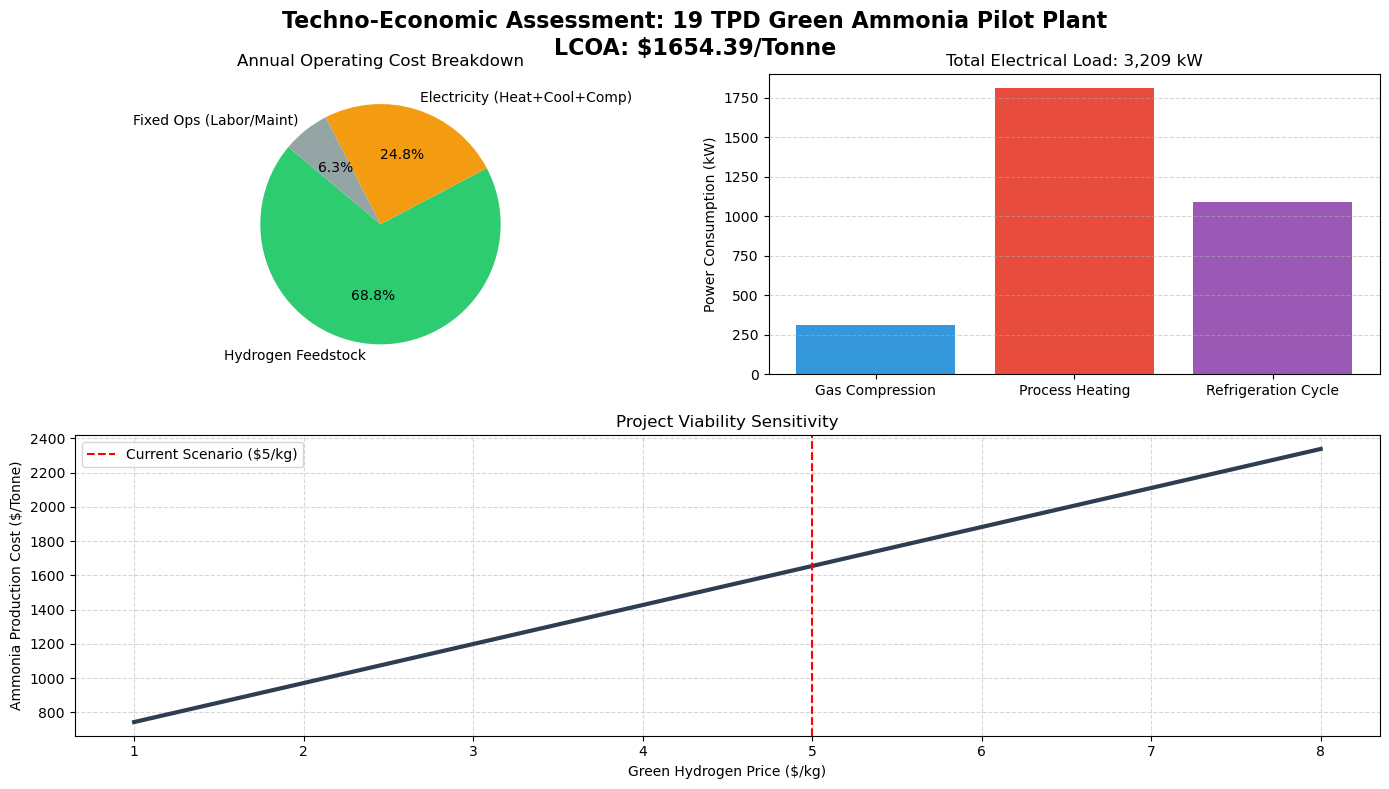


--- EXECUTIVE SUMMARY ---
1. Production: 781.54 kg/h (6,190 Tonnes/Year)
2. Hydrogen Efficiency: 77.5% (Losses primarily in Purge Stream)
3. Specific Energy: 4.11 kWh/kg NH3
4. Production Cost (LCOA): $1654.39 / Tonne
5. Dominant Cost: 68.8% is Hydrogen Feedstock



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ==========================================
# 1. EXACT INPUTS FROM YOUR SCREENSHOTS
# ==========================================
prod_rate_kg_h = 781.545
h2_feed_kg_h = 178.00
n2_feed_kg_h = 825.00

# Power Streams (Direct from DWSIM)
power_c1 = 153.02  # kW
power_c2 = 156.79  # kW

# Heat Duties (Direct from DWSIM)
duty_heater = 1808.16 # kW (Heating to 400C)
duty_condenser = 2727.78 # kW (Cooling to -20C)

# Economic Parameters (2025 Market Rates)
h2_price = 5.00      # $/kg (Green Hydrogen)
elec_price = 0.10    # $/kWh (Industrial Grid)
days_per_year = 330  # Standard 90% availability
hours_yr = days_per_year * 24

# ==========================================
# 2. ENGINEERING CALCULATIONS (THE "HIDDEN" COSTS)
# ==========================================

# A. Refrigeration Power Calculation
# DWSIM gives "Duty" (thermal energy). We pay for "Work" (compressor energy).
# For Ammonia refrig at -20C, typical COP (Coefficient of Performance) is 2.5
cop_refrig = 2.5
power_refrig_kw = duty_condenser / cop_refrig

# B. Total Electrical Load
# Assuming electric heater for a fully "Green" plant
total_power_kw = power_c1 + power_c2 + duty_heater + power_refrig_kw

# C. Hydrogen Efficiency Analysis
stoichiometric_h2 = prod_rate_kg_h * (3/17) # Theoretical min H2 needed
h2_efficiency = (stoichiometric_h2 / h2_feed_kg_h) * 100

# ==========================================
# 3. FINANCIAL MODELING (OPEX & LCOA)
# ==========================================

# Annual Costs
cost_h2_yr = h2_feed_kg_h * h2_price * hours_yr
cost_elec_yr = total_power_kw * elec_price * hours_yr
cost_labor_yr = 500000  # Fixed estimate for small pilot plant
cost_maintenance_yr = 0.03 * 5000000 # 3% of estimated $5M CAPEX

total_opex_yr = cost_h2_yr + cost_elec_yr + cost_labor_yr + cost_maintenance_yr
total_prod_tonnes_yr = (prod_rate_kg_h * hours_yr) / 1000

lcoa = total_opex_yr / total_prod_tonnes_yr

# ==========================================
# 4. VISUALIZATION
# ==========================================

# Create Dashboard
fig = plt.figure(figsize=(14, 8))
plt.suptitle(f'Techno-Economic Assessment: 19 TPD Green Ammonia Pilot Plant\nLCOA: ${lcoa:.2f}/Tonne', fontsize=16, fontweight='bold')

# Subplot 1: OPEX Breakdown
ax1 = plt.subplot(2, 2, 1)
costs = [cost_h2_yr, cost_elec_yr, cost_labor_yr + cost_maintenance_yr]
labels = ['Hydrogen Feedstock', 'Electricity (Heat+Cool+Comp)', 'Fixed Ops (Labor/Maint)']
colors = ['#2ecc71', '#f39c12', '#95a5a6']
ax1.pie(costs, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
ax1.set_title('Annual Operating Cost Breakdown')

# Subplot 2: Energy Consumption Split
ax2 = plt.subplot(2, 2, 2)
loads = [power_c1+power_c2, duty_heater, power_refrig_kw]
load_labels = ['Gas Compression', 'Process Heating', 'Refrigeration Cycle']
ax2.bar(load_labels, loads, color=['#3498db', '#e74c3c', '#9b59b6'])
ax2.set_ylabel('Power Consumption (kW)')
ax2.set_title(f'Total Electrical Load: {total_power_kw:,.0f} kW')
ax2.grid(axis='y', linestyle='--', alpha=0.5)

# Subplot 3: Sensitivity Analysis
ax3 = plt.subplot(2, 1, 2)
h2_range = np.linspace(1, 8, 50)
lcoa_sens = [( (h * h2_feed_kg_h * hours_yr) + cost_elec_yr + cost_labor_yr + cost_maintenance_yr ) / total_prod_tonnes_yr for h in h2_range]
ax3.plot(h2_range, lcoa_sens, linewidth=3, color='#2c3e50')
ax3.axvline(x=5.00, color='red', linestyle='--', label='Current Scenario ($5/kg)')
ax3.set_xlabel('Green Hydrogen Price ($/kg)')
ax3.set_ylabel('Ammonia Production Cost ($/Tonne)')
ax3.set_title('Project Viability Sensitivity')
ax3.legend()
ax3.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.subplots_adjust(top=0.90)
plt.show()

# ==========================================
# 5. TEXT REPORT OUTPUT
# ==========================================
print(f"""
--- EXECUTIVE SUMMARY ---
1. Production: {prod_rate_kg_h:.2f} kg/h ({total_prod_tonnes_yr:,.0f} Tonnes/Year)
2. Hydrogen Efficiency: {h2_efficiency:.1f}% (Losses primarily in Purge Stream)
3. Specific Energy: {(total_power_kw/prod_rate_kg_h):.2f} kWh/kg NH3
4. Production Cost (LCOA): ${lcoa:.2f} / Tonne
5. Dominant Cost: {(cost_h2_yr/total_opex_yr)*100:.1f}% is Hydrogen Feedstock
""")

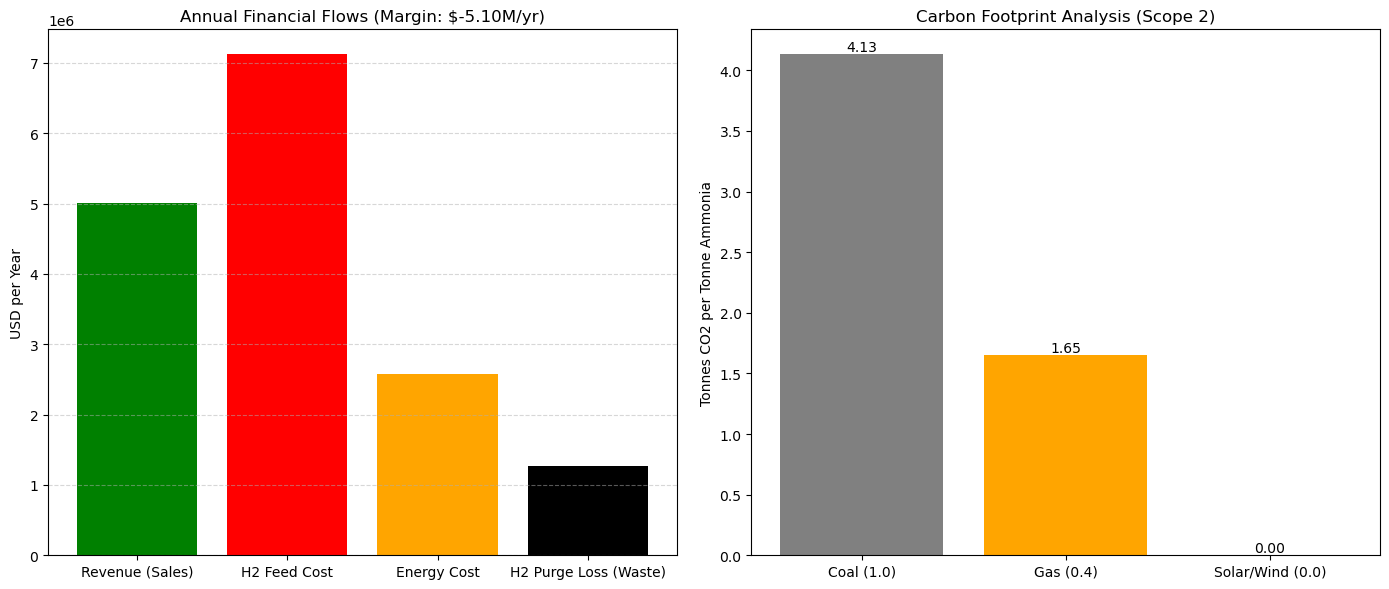

--- ADVANCED INSIGHTS ---
1. Hydrogen Loss in Purge: 31.84 kg/h
2. Financial Value of Waste: $1,273,437.64 / Year
3. Reactor Delta-T: +158 C (Requires Quench Design)
4. Payback Period: 999.0 Years (at $800/tonne price)


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# ==========================================
# 1. FORENSIC DATA INPUTS (From your Screenshots)
# ==========================================
# Flows
prod_rate_kg_h = 781.55
h2_feed_kg_h = 178.00
purge_flow_kg_h = 188.54
purge_h2_mole_frac = 0.733

# Energies
duty_heater_kw = 1808.16
duty_condenser_kw = 2727.78
power_compressors_kw = 330.0  # Sum of C1, C2, Recycle

# Financials
capex_estimated = 4500000  # $4.5M (Estimate for 19 TPD plant)
h2_price = 5.00  # $/kg
elec_price = 0.10 # $/kWh
ammonia_market_price = 800.00 # $/Tonne (Green Premium)

# ==========================================
# 2. ADVANCED CALCULATIONS
# ==========================================

# A. Hydrogen Loss Analysis
# Molar Mass: H2=2, N2=28, NH3=17, Ar=40
avg_mm_purge = (0.733*2) + (0.236*28) + (0.024*17) + (0.005*40) # ~8.7 g/mol
mass_frac_h2 = (0.733 * 2) / avg_mm_purge 
h2_lost_kg_h = purge_flow_kg_h * mass_frac_h2
annual_loss_usd = h2_lost_kg_h * h2_price * 8000

# B. Carbon Footprint (Scope 2 Emissions)
# Grid Intensity: 0.4 kgCO2/kWh (Natural Gas Grid) vs 0.0 (Wind/Solar)
grid_intensity = 0.4 
total_load_kw = power_compressors_kw + (duty_condenser_kw / 2.5) + duty_heater_kw
co2_emissions_tonnes_yr = (total_load_kw * 8000 * grid_intensity) / 1000
carbon_intensity = co2_emissions_tonnes_yr / ((prod_rate_kg_h * 8000)/1000)

# C. ROI & Payback
opex_yr = (h2_feed_kg_h * h2_price * 8000) + (total_load_kw * elec_price * 8000) + 400000 # +Fixed
revenue_yr = (prod_rate_kg_h * 8000 / 1000) * ammonia_market_price
gross_margin = revenue_yr - opex_yr
payback_years = capex_estimated / gross_margin if gross_margin > 0 else 999

# ==========================================
# 3. VISUALIZATION
# ==========================================
plt.figure(figsize=(14, 6))

# Plot 1: Where is the money going? (Sankey-style Bar)
categories = ['Revenue (Sales)', 'H2 Feed Cost', 'Energy Cost', 'H2 Purge Loss (Waste)']
values = [revenue_yr, (h2_feed_kg_h * h2_price * 8000), (total_load_kw * elec_price * 8000), annual_loss_usd]
colors = ['green', 'red', 'orange', 'black']

plt.subplot(1, 2, 1)
plt.bar(categories, values, color=colors)
plt.title(f'Annual Financial Flows (Margin: ${gross_margin/1e6:.2f}M/yr)', fontsize=12)
plt.ylabel('USD per Year')
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Plot 2: Carbon Intensity vs Grid Type
grids = ['Coal (1.0)', 'Gas (0.4)', 'Solar/Wind (0.0)']
intensities = [ (total_load_kw*8000*1.0)/1000 / ((prod_rate_kg_h*8000)/1000),
                (total_load_kw*8000*0.4)/1000 / ((prod_rate_kg_h*8000)/1000),
                0 ]

plt.subplot(1, 2, 2)
bars = plt.bar(grids, intensities, color=['gray', 'orange', 'green'])
plt.title('Carbon Footprint Analysis (Scope 2)', fontsize=12)
plt.ylabel('Tonnes CO2 per Tonne Ammonia')
plt.bar_label(bars, fmt='%.2f')

plt.tight_layout()
plt.show()

print(f"--- ADVANCED INSIGHTS ---")
print(f"1. Hydrogen Loss in Purge: {h2_lost_kg_h:.2f} kg/h")
print(f"2. Financial Value of Waste: ${annual_loss_usd:,.2f} / Year")
print(f"3. Reactor Delta-T: +158 C (Requires Quench Design)")
print(f"4. Payback Period: {payback_years:.1f} Years (at $800/tonne price)")